# Bias vs variance trade-off

We use the function $f(x) = 7.2 - 3.1x + 4.3x^3$ from **Exercise 1.3.** to generate our training samples and test samples. Again we will take the interval $(-5, 8)$ and add Gaussian noise with means 0 and standard deviation $\sigma = 150$ to the data points.

In [12]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# define objective function
def objective_function(x):
    return 7.2 - 3.1*x + 4.3*x**3

# define parameters for mean and standard deviation
mean = 0
standard_deviation = 150

# define function to generate gaussian noise for a given number of data points
def generate_gaussian_noise(desired_number_of_data_points):
    return np.random.normal(mean, standard_deviation, desired_number_of_data_points)

### Number of data points vs Error

Here we will use a fixed model complexity e.g. Polynomial of degree 3 and different amounts of data points for fitting with linear regression.

In [13]:
# define function to generate test and training sets with a given number of data points
def generate_training_and_test_dataset(desired_number_of_data_points):
    
    x_values = np.linspace(-5,8, desired_number_of_data_points)
    noise = generate_gaussian_noise(desired_number_of_data_points)
    y_values = objective_function(x_values) + noise
    
    # Here we split our dataset into 75% training samples and 25% test samples
    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25)
    
    return x_train, x_test, y_train, y_test

# function to convert input array into an input array with polynomial features
def get_x_values_with_polynomial_features(x_values, polynomial_degree):
    reshaped_x_values = x_values.reshape(len(x_values),1)
    return PolynomialFeatures(polynomial_degree).fit_transform(reshaped_x_values)

# define a function to fit a polynomial to a given dataset
def fit_polynomial(samples_x_values, samples_y_values, polynomial_degree):
    x_values_with_polynomial_features = get_x_values_with_polynomial_features(samples_x_values, polynomial_degree)
    return linear_model.LinearRegression().fit(x_values_with_polynomial_features, samples_y_values)

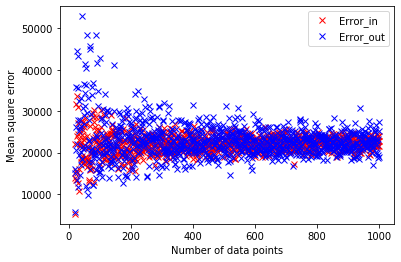

In [14]:
number_of_data_points = np.linspace(20,1000,1000)
degree_of_polynomial = 3
errors_in = []
errors_out = []

for number in number_of_data_points:
    #Get training sets and test sets with the number of data points specified in the linspace array
    training_set_x_values, test_set_x_values, training_set_y_values, test_set_y_values = generate_training_and_test_dataset(np.int_(number))
    #Fit the polynomial model with the training sets
    model = fit_polynomial(training_set_x_values, training_set_y_values, degree_of_polynomial)
    
    # Append the mean square error of the training set to an array
    errors_in.append(mean_squared_error(training_set_y_values, model.predict(get_x_values_with_polynomial_features(training_set_x_values, degree_of_polynomial))))
    # Append the mean square error of the test set to an array
    errors_out.append(mean_squared_error(test_set_y_values, model.predict(get_x_values_with_polynomial_features(test_set_x_values, degree_of_polynomial))))

plt.plot(number_of_data_points, errors_in, 'rx', label='Error_in')
plt.plot(number_of_data_points, errors_out, 'bx', label='Error_out')
plt.xlabel('Number of data points')
plt.ylabel('Mean square error')
plt.legend()

We can see that $\text{Error}_{in}$ and $\text{Error}_{out}$ do qualitatively behave as seen in the schematic plot of the lecture **Number of data points vs Error**. It should be noted that since the noise is generated at random, the plot above will vary each time this Jupyter notebook is run. But the qualitative behaviour will stay the same.

### Model complexity vs Error
Now we have a fixed number of data points and use as models polynomials with different degrees.

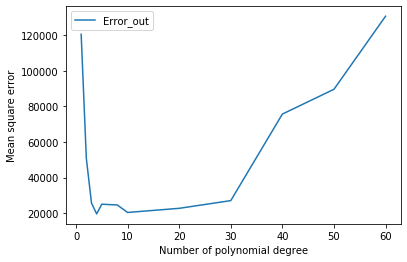

In [15]:
fixed_number_of_data_points = 1000
degree_of_polynomials = [1, 2, 3, 4, 5, 8, 10, 20, 30, 40, 50, 60]

errors_out = []

for degree in degree_of_polynomials:
    #Get training sets and test sets
    training_set_x_values, test_set_x_values, training_set_y_values, test_set_y_values = generate_training_and_test_dataset(fixed_number_of_data_points)
    #Fit the polynomial model with the training sets
    model = fit_polynomial(training_set_x_values, training_set_y_values, degree)
    
    # Append the mean square error of the training set to an array
    errors_in.append(mean_squared_error(training_set_y_values, model.predict(get_x_values_with_polynomial_features(training_set_x_values, degree))))
    # Append the mean square error of the test set to an array
    errors_out.append(mean_squared_error(test_set_y_values, model.predict(get_x_values_with_polynomial_features(test_set_x_values, degree))))

plt.plot(degree_of_polynomials, errors_out, label='Error_out', )
plt.xlabel('Number of polynomial degree')
plt.ylabel('Mean square error')
plt.legend()

We can see that $\text{Error}_{out}$ do qualitatively behave as seen in the schematic plot of the lecture **Model complexity vs Error**. As noted previously the noise is generated at random, so plot above will vary each time this Jupyter notebook is run. But the qualitative behaviour will stay the same.